# 2. Datos 

**English**

#### Los datos utilizados para este estudio se obtuvieron del Departamento de Transporte de Seattle.

The data used is from Seattle's Collision GIS (Geographic Information System), a computer system used for capturing, storing and displaying data related to positions on Earth's surface. The data is from 2004 to the present and contains various features such as location, the severity of the collision, number of vehicles/cyclists/pedestrians involved, date/time of incident, weather, road conditions and more. There are almost 200,000 collisions in the dataset and 38 features. While some of the features won't be useful or have many missing values, the ones that I will explore in more detail will be:
* Severity Code - this will be the target that we'll compare the features' impact on.
* Severity Description - description of the severity codes.
* X and Y values (coordinates) - are there areas where collisions are more concentrated?
* Address Type - alley, block or intersection of collision.
* Collision Type - 10 types of collisions such as parked car, angles, rear end, pedestrian, etc.
* Person Count - # of people involved in collision.
* Pedestrian Count - # of pedestrians involved in collision.
* Cyclist Count - # of cyclists involved in collision.
* Vehicle count - # of vehicles involved in collision.
* Date/Time - are number of or severity of collisions more likely to occur on certain days or times?
* Junction Type - 7 types describing collision at intersection, mid-block, driveway and whether collision is related to intersection.
* Seattle Collision Code - Seattle codes to describe each collision.
* Seattle Collision Description - description of Seattle collision codes.
* Under Influence - was alcohol or drugs involved?
* Weather - do more collisions occur because of adverse weather?
* Road Conditions - do more collisions occur because of adverse road conditions?
* Light Conditions - do more collisions occur because of adverse light conditions?
* State Collision Code - 84 codes the state uses to descibe each collision.
* State Collision Description - description of state collision codes.
* Hit Parked Car - was a parked car involved in the collision?

In the following section I will use graphs to gain insight into the data, and decide which features will be useful when predicting injuries when these collisions occur.

**Español**

#### Los datos utilizados para este estudio se obtuvieron del Departamento de Transporte de Seattle.

Los datos utilizados proceden del Collision GIS (Sistema de Información Geográfica) de Seattle, un sistema informático utilizado para capturar, almacenar y mostrar datos relacionados con las posiciones en la superficie de la Tierra. Los datos son desde 2004 hasta el presente y contienen varias características como la ubicación, la gravedad de la colisión, el número de vehículos / ciclistas / peatones involucrados, la fecha / hora del incidente, el clima, las condiciones de la carretera y más. Hay casi 200.000 colisiones en el conjunto de datos y 38 características. Si bien algunas de las características no serán útiles o tendrán muchos valores faltantes, las que exploraré con más detalle serán:

* Código de gravedad: este será el objetivo en el que compararemos el impacto de las funciones.
* Descripción de gravedad: descripción de los códigos de gravedad.
* Valores X e Y (coordenadas): ¿hay áreas donde las colisiones están más concentradas?
* Tipo de dirección: callejón, cuadra o intersección de colisión.
* Tipo de colisión: 10 tipos de colisiones, como automóvil estacionado, ángulos, parte trasera, peatón, etc.
* Recuento de personas: número de personas involucradas en la colisión.
* Recuento de peatones: número de peatones involucrados en una colisión.
* Conteo de ciclistas: número de ciclistas involucrados en una colisión.
* Recuento de vehículos: número de vehículos involucrados en la colisión.
* Fecha / hora: ¿es más probable que ocurra el número o la gravedad de las colisiones en determinados días u horas?
* Tipo de cruce: 7 tipos que describen la colisión en la intersección, la mitad de la cuadra, el camino de entrada y si la colisión está relacionada con la intersección.
* Código de colisión de Seattle: códigos de Seattle para describir cada colisión.
* Descripción de colisión de Seattle: descripción de los códigos de colisión de Seattle.
* Bajo influencia: ¿hubo alcohol o drogas involucrados?
* Clima: ¿ocurren más colisiones debido al clima adverso?
* Condiciones de la carretera: ¿se producen más colisiones debido a condiciones adversas de la carretera?
* Condiciones de luz: ¿se producen más colisiones debido a condiciones de luz adversas?
* Código de colisión estatal: 84 códigos que el estado usa para describir cada colisión.
* Descripción de colisión de estado: descripción de los códigos de colisión de estado.
* Coche estacionado atropellado: ¿hubo un automóvil estacionado involucrado en la colisión?

En la siguiente sección, usaré gráficos para comprender mejor los datos y decidir qué características serán útiles para predecir lesiones cuando ocurran estas colisiones.

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
# Load data into datafram and look at firs 5 collisions
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print('Number of Features: ', df.shape[1])
print('Number of Recorded Collisions: ',df.shape[0])

Number of Features:  38
Number of Recorded Collisions:  194673


In [5]:
# check number of missing values for each feature

df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
def plot_bar(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot( x = codes, y = count )
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=20)
    plt.xticks(rotation=rotate)
    plt.show()
    
def plot_barh(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot( x = count, y = codes )
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=20)
    plt.xticks(rotation=rotate)
    plt.show()
    

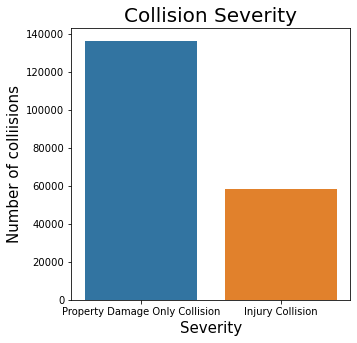

In [7]:
plot_bar(df['SEVERITYDESC'],'Severity','Number of colliisions','Collision Severity', size=(5,5))

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



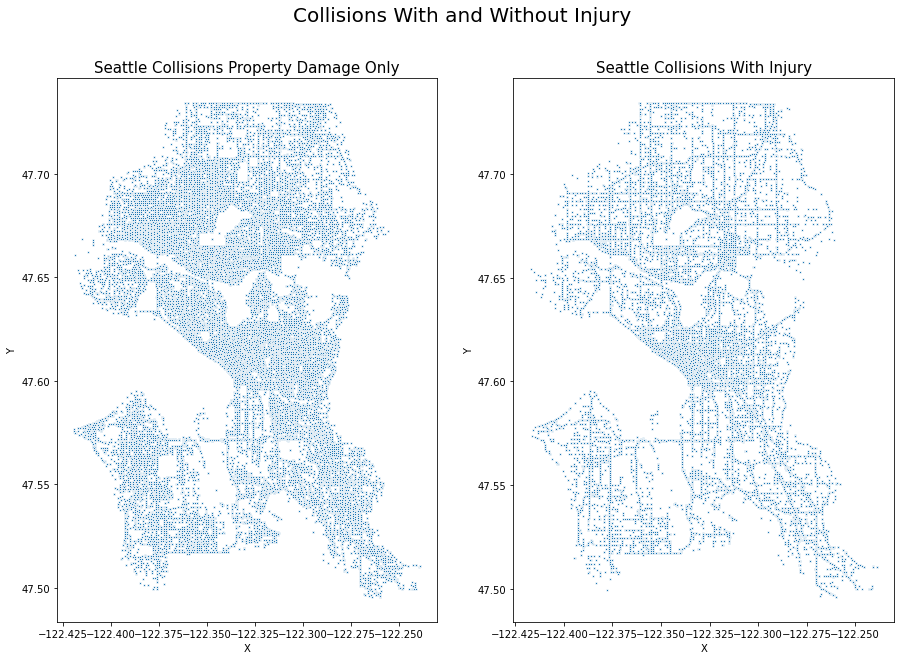

In [13]:
# Grafico en el mapa

property_damage_df = df.loc[df['SEVERITYCODE']==1]
injury_df = df.loc[df['SEVERITYCODE']==2]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Collisions With and Without Injury', fontsize=20)
ax1 = sns.scatterplot(x=property_damage_df['X'], y=property_damage_df['Y'], s=5, ax=ax1 )
ax1.set_title('Seattle Collisions Property Damage Only', fontsize=15)
ax2 = sns.scatterplot(x=injury_df['X'], y=injury_df['Y'], s=5, ax=ax2)
ax2.set_title('Seattle Collisions With Injury', fontsize=15);


In [14]:
#coordenadas seattle
longitud_seattle =-122.3320700
latitud_seattle = 47.6062100
seattle_map = folium.Map(location=[latitud_seattle, longitud_seattle], zoom_start=11)


In [15]:
print('Cantidad de NAN: ',property_damage_df['X'].isnull().sum())
print('Cantidad de NAN: ',property_damage_df['Y'].isnull().sum())
print('Cantidad de NAN: ',property_damage_df['SEVERITYCODE'].isnull().sum())
property_damage_df = property_damage_df.dropna(axis=0, subset=['X','Y','SEVERITYCODE'])


Cantidad de NAN:  4264
Cantidad de NAN:  4264
Cantidad de NAN:  0


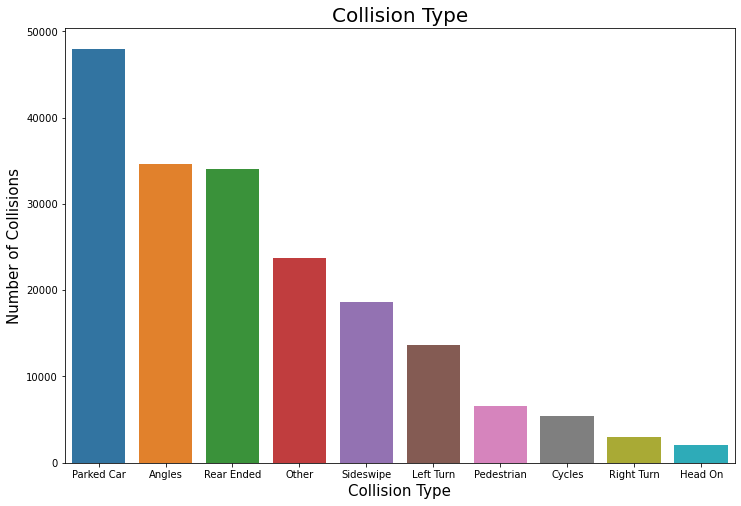

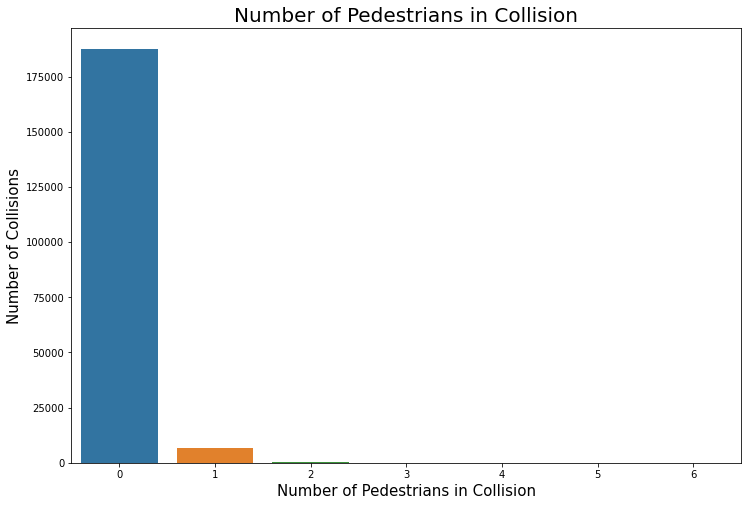

In [16]:
plot_bar(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', rotate=0)
plot_bar(df['PEDCOUNT'], 'Number of Pedestrians in Collision', 'Number of Collisions', 'Number of Pedestrians in Collision')


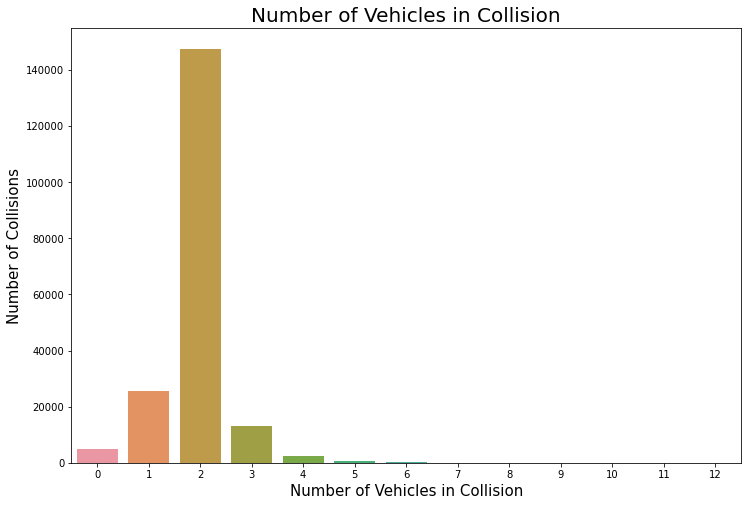

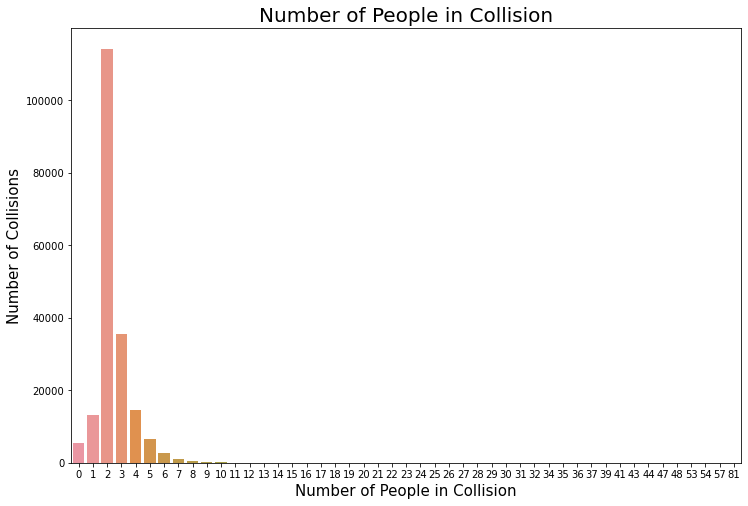

In [17]:
plot_bar(df['VEHCOUNT'], 'Number of Vehicles in Collision', 'Number of Collisions', 'Number of Vehicles in Collision')
plot_bar(df['PERSONCOUNT'], 'Number of People in Collision', 'Number of Collisions', 'Number of People in Collision')

In [18]:
#Normalizando fecha de accidente 

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], infer_datetime_format=True)
df['Year'] = df['INCDTTM'].dt.year
df['Month'] = df['INCDTTM'].dt.month
df['Day'] = df['INCDTTM'].dt.weekday

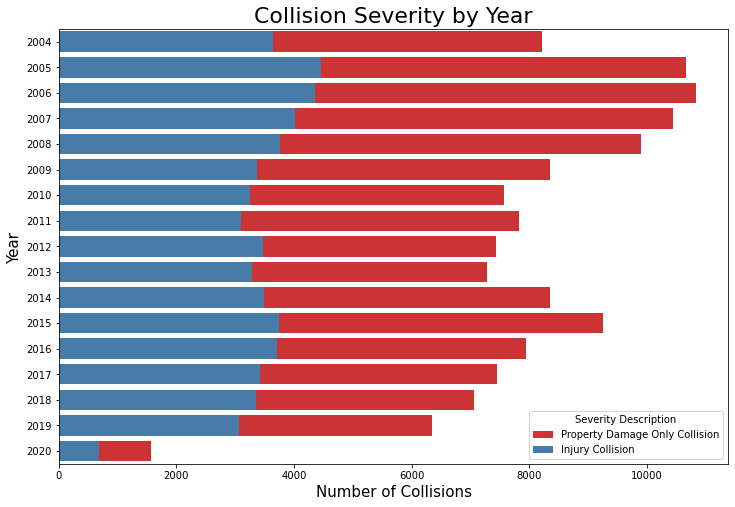

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y='Year', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False, palette="Set1")
ax.set_ylabel('Year', fontsize=15)
ax.set_xlabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Year', fontsize=22)
ax.legend(title='Severity Description');

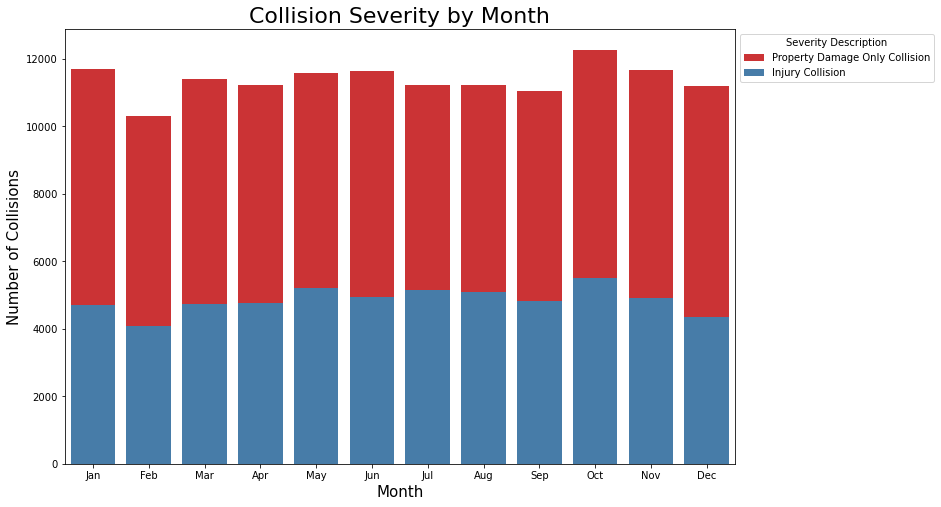

In [20]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Month', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False, palette="Set1")
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Month', fontsize=22)
ax.set_xticklabels(months)
ax.legend(title='Severity Description', bbox_to_anchor=(1,1));

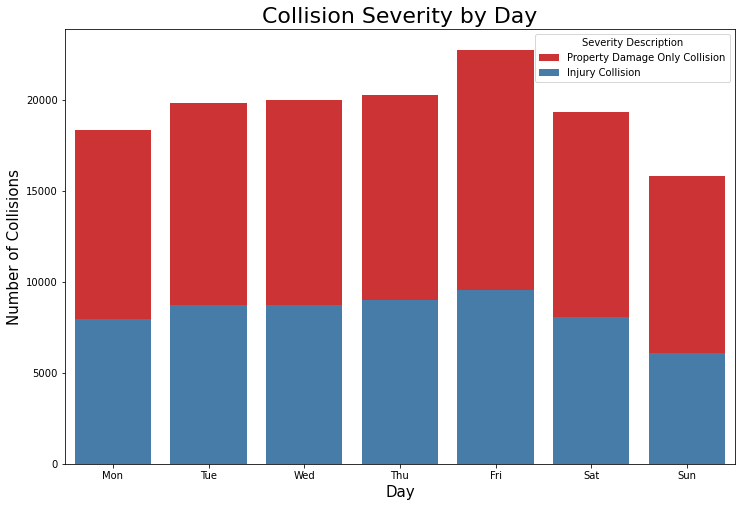

In [21]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Day', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False, palette="Set1")
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Day', fontsize=22)
ax.set_xticklabels(days)
ax.legend(title='Severity Description');

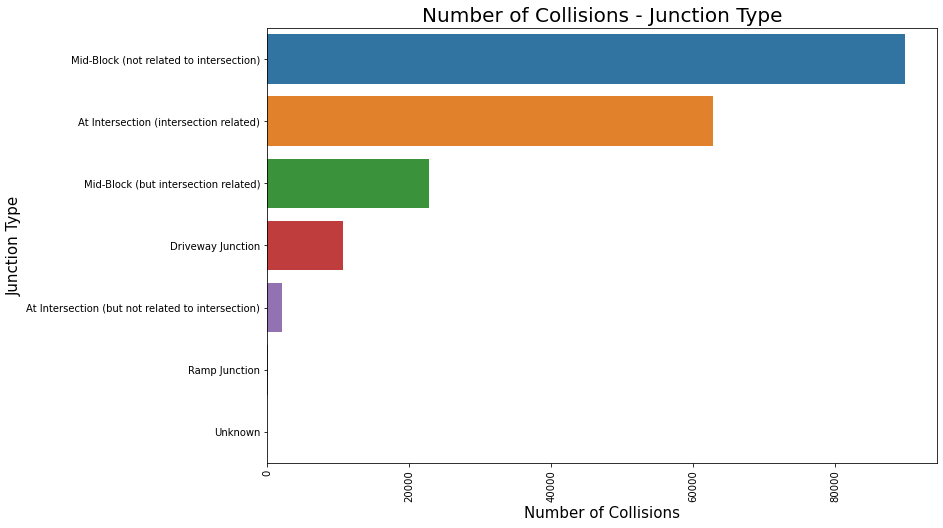

In [22]:
plot_barh(df['JUNCTIONTYPE'], 'Number of Collisions',  'Junction Type', 'Number of Collisions - Junction Type', rotate=90)

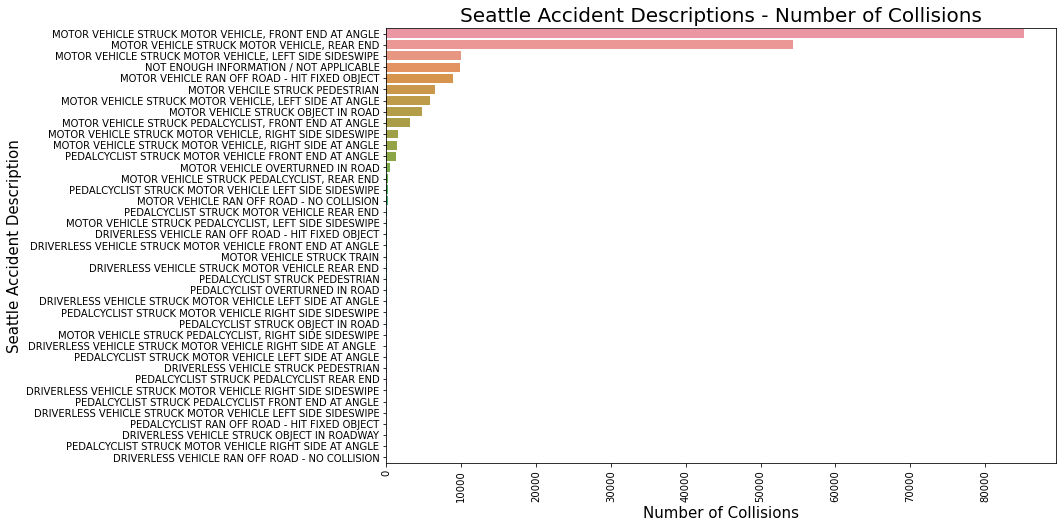

In [23]:
plot_barh(df['SDOT_COLDESC'], 'Number of Collisions',  'Seattle Accident Description','Seattle Accident Descriptions - Number of Collisions', rotate=90)

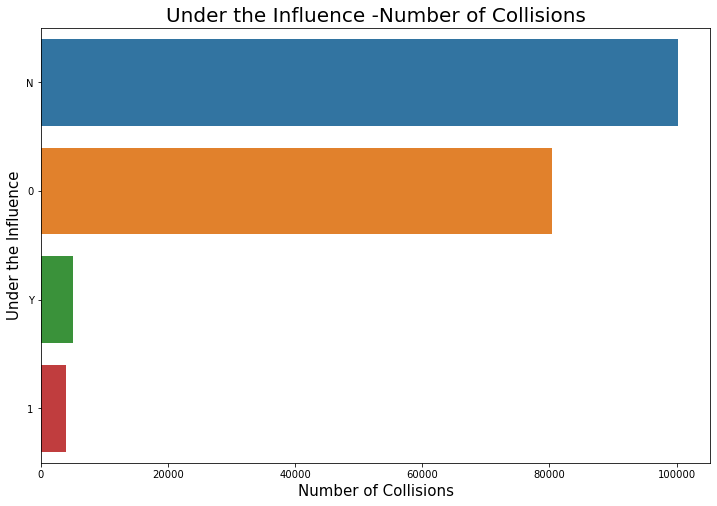

In [24]:
plot_barh(df['UNDERINFL'], 'Number of Collisions',  'Under the Influence','Under the Influence -Number of Collisions')

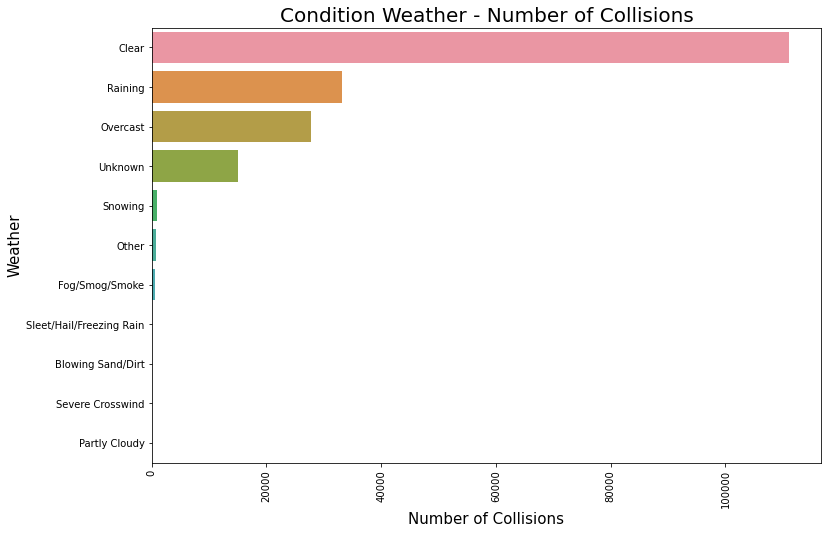

In [25]:
plot_barh(df['WEATHER'], 'Number of Collisions', 'Weather','Condition Weather - Number of Collisions', rotate=90)

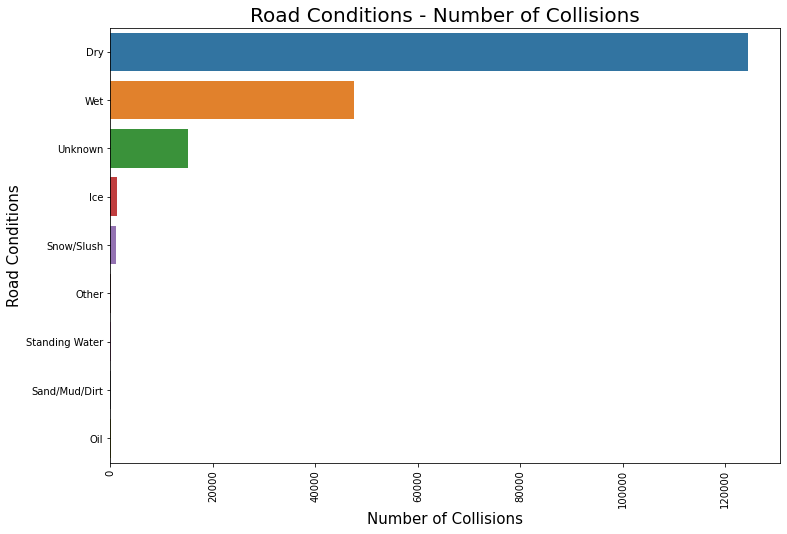

In [26]:
plot_barh(df['ROADCOND'], 'Number of Collisions',  'Road Conditions','Road Conditions - Number of Collisions', rotate=90)

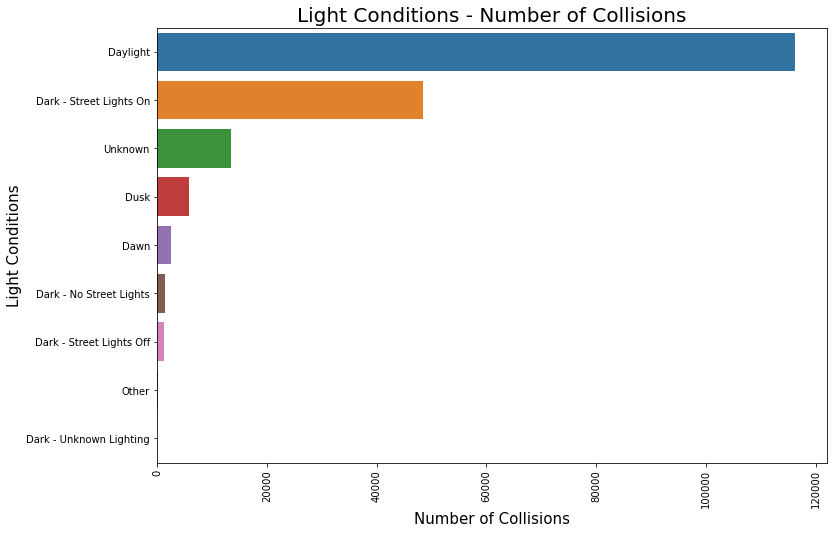

In [27]:
plot_barh(df['LIGHTCOND'], 'Number of Collisions',  'Light Conditions','Light Conditions - Number of Collisions', rotate=90)

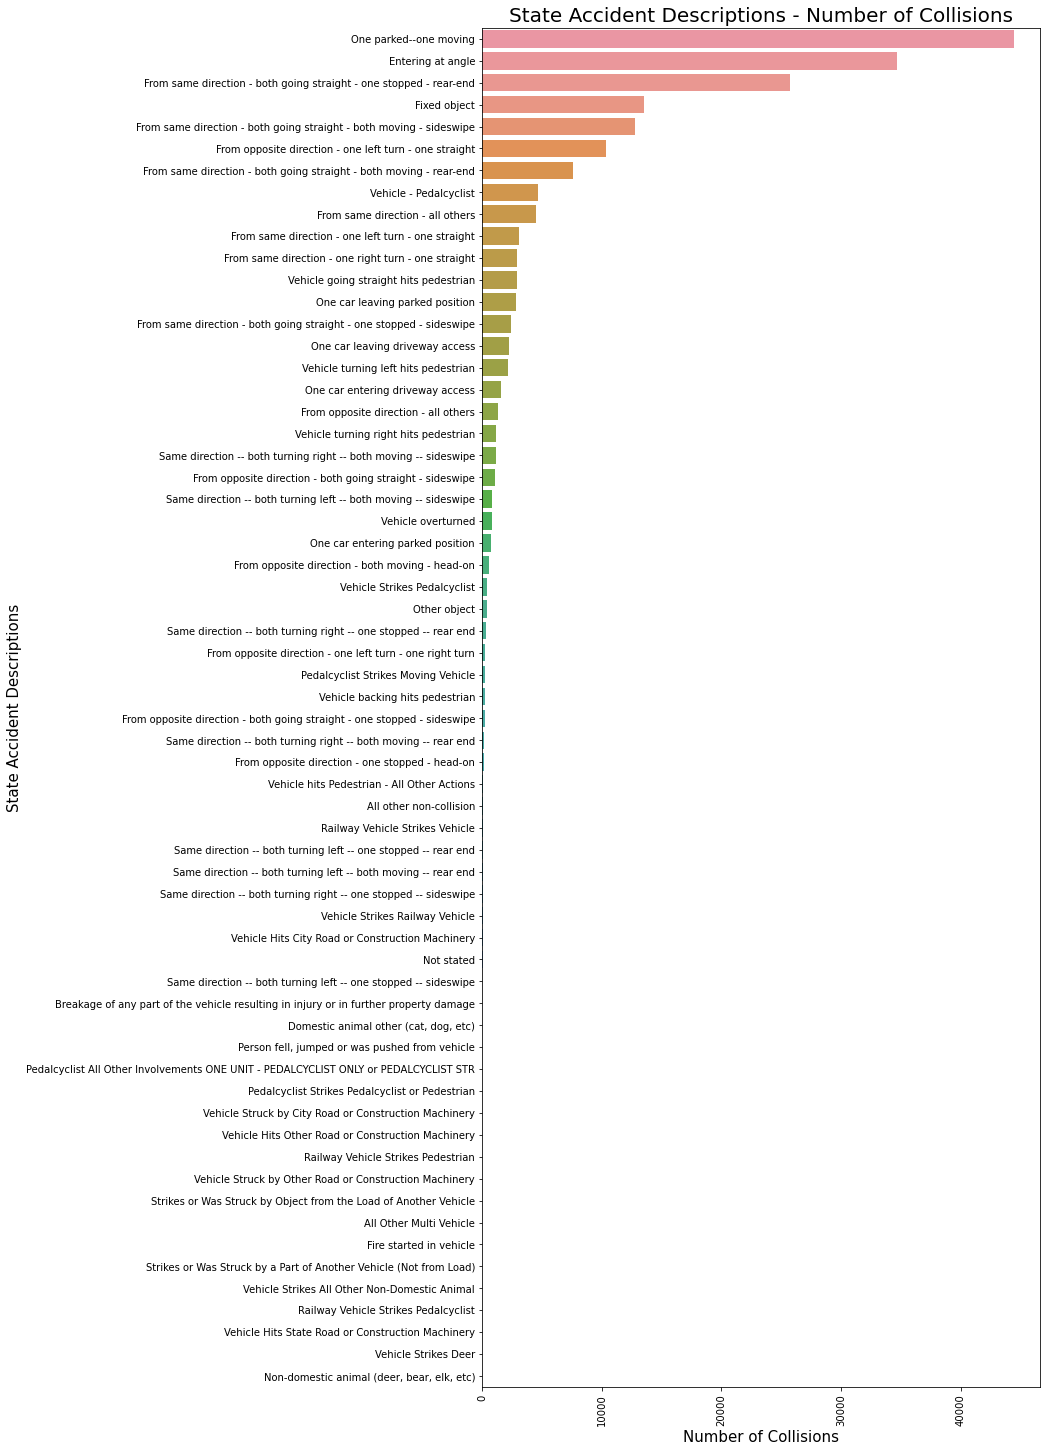

In [28]:
plot_barh(df['ST_COLDESC'], 'Number of Collisions', 'State Accident Descriptions', 'State Accident Descriptions - Number of Collisions', size=(10,25), rotate=90)

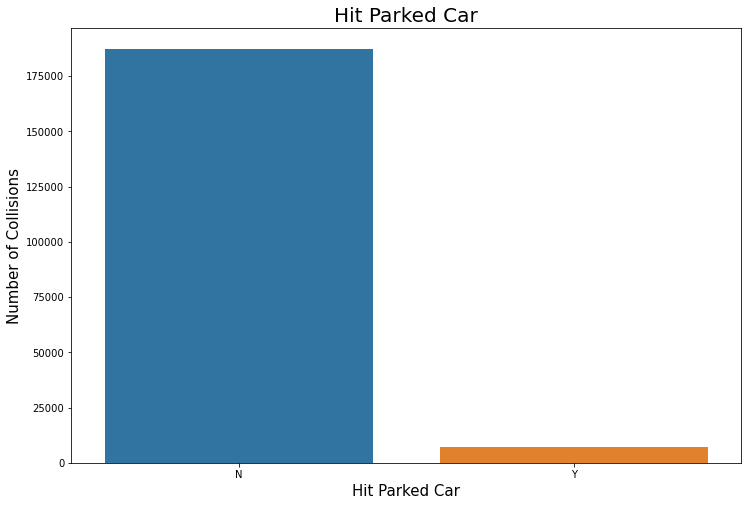

In [29]:
plot_bar(df['HITPARKEDCAR'], 'Hit Parked Car', 'Number of Collisions', 'Hit Parked Car',)

## Conclusion

Luego de realizar el primer analisis rapido sobre el conjunto de datos que obtuvimos de muestra de accidentes en Seattle se detalla.

* Hay muchas más colisiones que involucran solo daños a la property damage versus lesiones.
* Las colisiones que involucran lesiones tienden a ocurrir en y alrededor del centro de la ciudad y las carreteras principales, mientras que las colisiones sin lesiones se distribuyen uniformemente.
* Las colisiones ocurren con más frecuencia en los bloques que en las intersecciones, muy bajo tasa de accidentes en otras .
* La mayoría de los tipos de colisiones son con automóviles estacionados. Los ángulos y las colisiones traseras también son comunes.
* La cantidad más cfrecuente de personas involucradas en colisiones es 2.
* Casi no se involucra a peatones o ciclistas en los accidentes.
* La mayoría de las colisiones involucran a 2 vehículos.
* Aunque el número de colisiones ha fluctuado durante los últimos 16 años, parece tener una tendencia a la baja. La recesión entre 2007-2009 y el crecimiento que siguió después pueden haber tenido un impacto.
* El número de colisiones tiende a aumentar levemente en octubre y disminuir levemente en febrero.
* El número de colisiones tiende a subir ligeramente los viernes y bajar ligeramente los domingos.
* La mayoría de las colisiones no involucran alcohol o drogas.
* La mayoría de las colisiones ocurren cuando el clima está despejado, las carreteras están secas y es de día.
* La función de "coche aparcado atropellado" contradice la función de "tipo de colisión".

Los datos tiene coherencia entre si. Muchos de los accidentes ocurre en condiciones ideales para manejar. Esto me permite dar mi primera opinion sobre que los motivos de los accidentes se deben a descuidos o una mala infraestructura de tráfico. Seattle parece estar progresando hacia su plan Vision Zero, pero le queda mucho por hacer. Algunas de las características más relevantes para predecir la gravedad de una colisión pueden ser la ubicación, el tipo de dirección y el tipo de colisión. Además, dado que la mayoría de los días en Seattle están marcados con cielos nublados, el buen tiempo y las condiciones secas también pueden ser buenas características para predecir la gravedad de la colisión.